In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load the uploaded Excel file
file_path = 'klastering.xlsx'

# Let's first inspect the structure of the Excel file
data = pd.read_excel(file_path)
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


(None,
                       NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
 0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
 1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
 2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
 3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
 4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   
 
     STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
 0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
 1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
 2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
 3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
 4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0   
 
    IPK  STATUS KELULUSAN  
 0  3.07        TERLAMBAT  
 1  3.17        TERLAMBAT  
 2  3.54        TERLAMBAT  
 3  3.4

In [14]:
# Drop irrelevant columns for clustering
data_numeric = data.drop(columns=['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN'])


In [16]:
# Fill missing values with the mean of the column
data_numeric = data_numeric.fillna(data_numeric.mean())


In [17]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


In [18]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters


                      NAMA  Cluster
0           ANIK WIDAYANTI        2
1  DWI HESTYNA PRIHASTANTY        1
2       MURYA ARIEF BASUKI        1
3            NANIK SUSANTI        1
4        RIFKA ISTIQFARINA        2


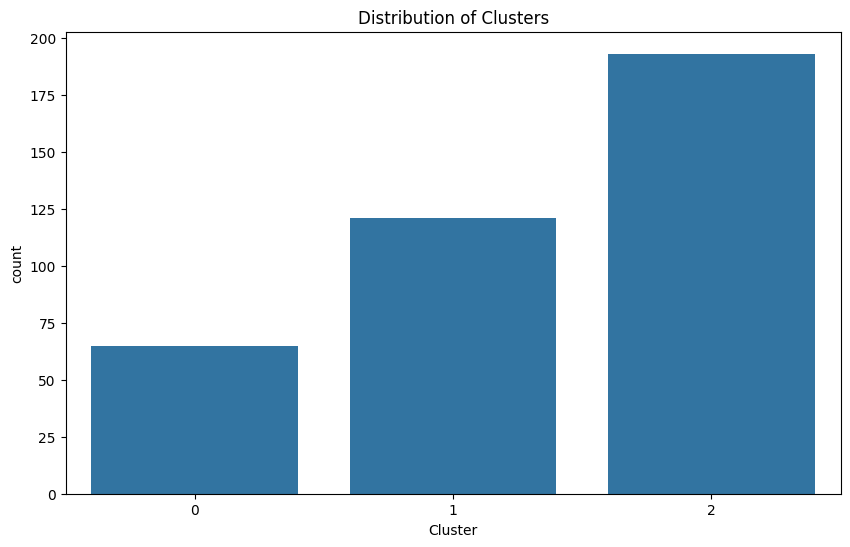

In [26]:
# Show the first few rows with the cluster labels
print(data[['NAMA', 'Cluster']].head())

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.show()
